<a href="https://colab.research.google.com/github/DataRecouver/Codes-DataScience-Python/blob/main/Deep%20Learning/Final-Projeto_01_CNN_Classificacao_de_Doen%C3%A7a_Mal%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina Deep Learning

## 1° Projeto em equipe
### Classificação de imagens de amostras positivas/negativas para malária

---
## Grupo
Ane Caroline <br/>
Carlos Alício <br/>
Felipe Coelho <br/>
Guilherme Cruz <br/>

---

Prazo de Entrega: Último dia de aula

## Descrição

De acordo com o Ministério da Saúde, a malária é uma doença infecciosa, causada por protozoários e transmitida pela picada do mosquito Anopheles. A doença tem cura e o tratamento é eficaz, porém pode haver evolução para formas graves se não for diagnosticada e tratada precocemente.

Você foi convidado pela ONG "Amazônia Muito Legal *(1)*" para participar de um projeto de identificação automática de células infectadas pela doença malária. A ONG disponibilizou um Dataset de imagens de amostras de lâminas de sangue, originalmente, coletado pela National Library of Medicine (https://lhncbc.nlm.nih.gov/publication/pub9932).

As imagens podem ser obtidas através do link: https://drive.google.com/file/d/1frar771fPjaOKqNt3scwQUIKdkTSxfyY/view?usp=sharing

O Dataset possui uma pasta "Imagens_Supeita_Malaria" contendo as subpastas "Positivo" e "Negativo" com 13780 imagens cada.

Exemplo de uma imagem de amostra com resultado Positivo para Malária:

<img src="https://drive.google.com/uc?export=view&id=103KemNIi7LYh4AOYh9jgS-6MRp7ROimN" alt="drawing" width="100"/>

Exemplo de uma imagem de amostra com resultado Negativo para Malária:

<img src="https://drive.google.com/uc?export=view&id=1Y5SSDYY5Qr-DvQdZAQtp43YHVZYBM80j" alt="drawing" width="100"/>


Observação:
*(1) - A ONG é fictícia*

##Classificação através de uma CNN

Construa uma CNN que consiga classificar as referidas imagens em positivas ou negativas para malária com uma acurácia de pelo menos 80% na validação.

Separe o dataset em pelo menos 80% para treino, 10% para validaçao e 10% para teste.

Use data augmentation para aprimorar a acurácia da CNN.

Exiba os gráficos da evolução da acurácia e da perda do treino e da validação.

Inclua a técnica de Transfer Learning Fine Tuning, utilizando um modelo pré treinado adequado ao tipo de dado do problema (faça uma busca nos repositórios vistos em sala ou outros).

O modelo final deve ter uma acurácia superior a 88% no dataset de teste.

Salve o modelo final em um arquivo.

Inclua comentários no código fonte e textos no notebook com as explicações de como foi feito. Poste o arquivo do notebook na resposta da atividade no google Classroom.

**Não esqueça de configurar a GPU no notebook do Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#o arquivo deve ser lido em formato .zip
#configurando o folder de leitura a partir do drive
drive_de_vcs = '/content/drive/MyDrive/DATASETS/'

fle_zip = drive_de_vcs + 'Imagens_Supeita_Malaria.zip'

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 1.8 MB/s eta 0:00:00


In [ ]:

import patoolib
patoolib.extract_archive(fle_zip, outdir="/content/")

patool: Extracting /content/drive/MyDrive/DATASETS/Imagens_Supeita_Malaria.zip ...
patool: running /usr/bin/7z x -o/content/ -- /content/drive/MyDrive/DATASETS/Imagens_Supeita_Malaria.zip
patool: ... /content/drive/MyDrive/DATASETS/Imagens_Supeita_Malaria.zip extracted to `/content/'.


'/content/'

## Carregando os Dados

Se você criou a estrutura de diretórios de forma correta conforme explicado no Capítulo 45, então as seguintes células mostrarão algumas das imagens:

In [ ]:
from IPython.display import Image


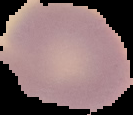

In [ ]:
Image(filename = '/content/Imagens_Supeita_Malaria/Negativo_Malaria/C1_thinF_IMG_20150604_104722_cell_115.png')

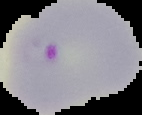

In [ ]:
Image(filename = '/content/Imagens_Supeita_Malaria/Positivo_Malaria/C182P143NThinF_IMG_20151201_172216_cell_161.png')

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

image_directory= '/content/Imagens_Supeita_Malaria'

output_folder= '/content/Imagens_Supeita_Malaria_split'

splitfolders.ratio(image_directory, output=output_folder,
        seed=42, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 27560 files [00:09, 3047.80 files/s]


## Construindo a Rede Neural Convolucional

Nossa rede é uma sequência de camadas e podemos usar o modelo sequencial oferecido pelo Keras, que possui as funções necessárias para construir cada camada de uma rede neural convolucional.

O primeiro passo é carregar os pacotes necessários, o que é feito nas células abaixo.

O Keras utiliza o TensorFlow como backend, pois na prática o Keras é apenas uma biblioteca para simplificar a complexidade do TensorFlow. Aqui estão as versões utilizadas:

In [ ]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.12.0


In [ ]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.12.0


In [ ]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Nós então inicializamos a nossa rede:

In [ ]:
# Inicializando a Rede Neural Convolucional
model = Sequential()

In [ ]:
# Passo 1 - Primeira Camada de Convolução
model.add(Conv2D(32, (3, 3), input_shape = (115, 115, 3), activation = 'relu'))

In [ ]:
# Passo 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adicionando a Segunda Camada de Convolução
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Passo 3 - Flattening
model.add(Flatten())

In [ ]:
# Passo 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compilando a rede
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Treinando a Rede Neural Convolucional

### Pré-Processamento (Data Augmentation)

Com a rede criada, precisamos agora realizar o treinamento. Antes, porém, precisamos fazer algum pré-processamento nos dados, em nosso caso as imagens. Para essa tarefa, vamos usar a função ImageDataGenerator() do Keras e ajustar escala e zoom das imagens de treino e a escala das imagens de validação.

O pré-processamento dos dados é etapa crucial em qualquer projeto de Machine Learning e muitas técnicas podem ser usadas, sempre de acordo com os dados em mãos e o problema que estamos tentando resolver. Nos cursos da Data Science Academy ensinamos aos alunos uma variedade de técnicas.

In [ ]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
dir = "/content/Imagens_Supeita_Malaria_split"

train_dir = dir + '/train'
validation_dir = dir + '/val'
test_dir = dir + '/test'

Aplicamos então os dois objetos criados anteriormente para pré-processar os dados de treino e de validação. Lembre-se: o tratamento aplicado aos dados de validação deve ser o mesmo tratamento aplicado aos dados de treino.

In [ ]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (115, 115),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = (115, 115),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


### Treinamento

In [ ]:
_epochs = 10

In [ ]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
import os
_steps_per_epoch = len(os.listdir(train_dir))

_validation_steps = len(validation_dir)

history = model.fit(training_set,
                epochs = _epochs,
                batch_size=32,
                validation_data = validation_set)

Epoch 1/10
689/689 [==============================] - 110s 142ms/step - loss: 0.4384 - accuracy: 0.7793 - val_loss: 0.2050 - val_accuracy: 0.9271
Epoch 2/10
689/689 [==============================] - 98s 142ms/step - loss: 0.2063 - accuracy: 0.9306 - val_loss: 0.1973 - val_accuracy: 0.9343
Epoch 3/10
689/689 [==============================] - 99s 144ms/step - loss: 0.1838 - accuracy: 0.9406 - val_loss: 0.1640 - val_accuracy: 0.9488
Epoch 4/10
689/689 [==============================] - 97s 141ms/step - loss: 0.1713 - accuracy: 0.9461 - val_loss: 0.1832 - val_accuracy: 0.9456
Epoch 5/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1678 - accuracy: 0.9463 - val_loss: 0.1544 - val_accuracy: 0.9546
Epoch 6/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1588 - accuracy: 0.9503 - val_loss: 0.1575 - val_accuracy: 0.9528
Epoch 7/10
689/689 [==============================] - 97s 141ms/step - loss: 0.1573 - accuracy: 0.9500 - val_loss: 0.1475 - val_a

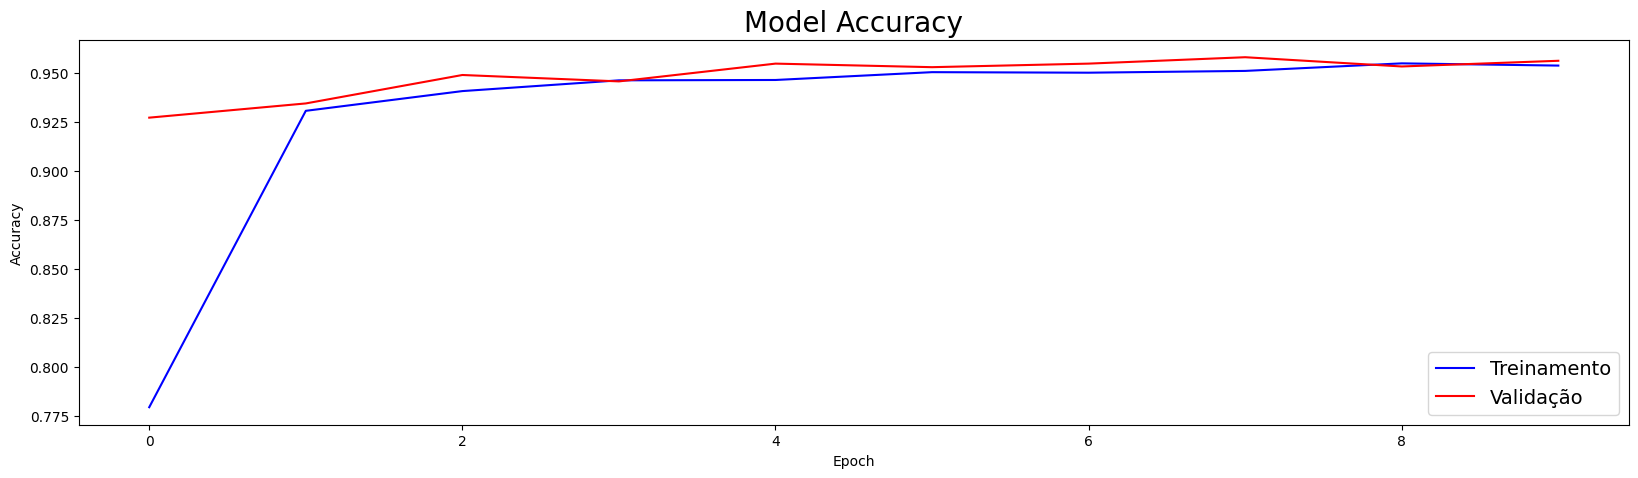

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='lower right', fontsize=14)
plt.show()

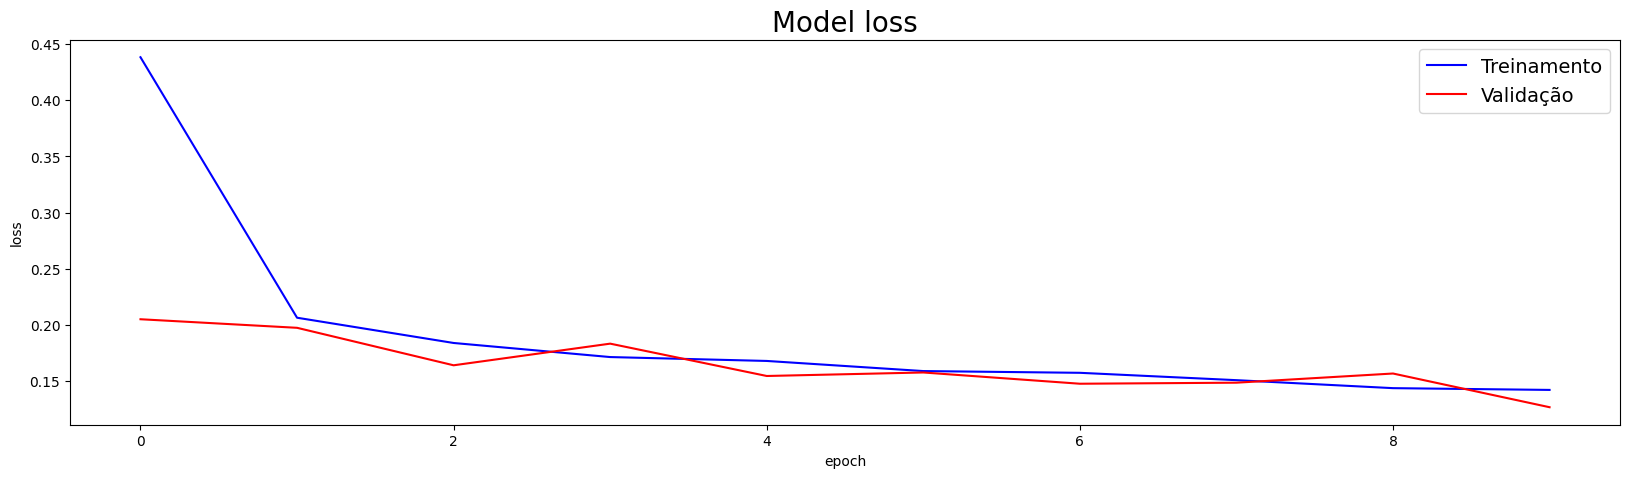

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

Treinamento concluído com sucesso! Observe que ao final de cada época a acurácia aumenta, ou seja, nosso modelo está aprendendo e cometendo cada vez menos erros! Essa é a magia por trás de Machine Learning, a pura aplicação de Matemática e Estatística, através de Programação e Ciência da Computação. Isso não é maravilhoso? Machine Learning está transformando o nosso mundo, à medida que treinamos as máquinas para realizar tarefas até então exclusivas dos seres humanos.

## Fazendo Previsões

1/1 [==============================] - 0s 183ms/step


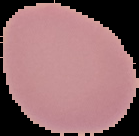

In [ ]:
# Primeira Imagem
import os, random
import numpy as np
from keras.utils import load_img, img_to_array
from keras.preprocessing import image

dir_teste = test_dir + '/Negativo_Malaria'

random_file = random.choice(os.listdir(dir_teste))

image_test = dir_teste + '/' + random_file

test_image = load_img(image_test, target_size = (115, 115))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Positivo'
else:
    prediction = 'Negativo'

Image(filename=image_test)

In [ ]:
# Previsão da primeira imagem
prediction

'Negativo'

1/1 [==============================] - 0s 18ms/step


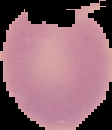

In [ ]:
# Segunda Imagem
dir_teste = test_dir + '/Negativo_Malaria'

random_file = random.choice(os.listdir(dir_teste))

image_test = dir_teste + '/' + random_file

test_image = load_img(image_test, target_size = (115, 115))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Positivo'
else:
    prediction = 'Negativo'

Image(filename=image_test)

In [ ]:
# Previsão da segunda imagem
prediction

'Negativo'

1/1 [==============================] - 0s 18ms/step


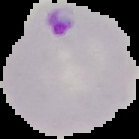

In [ ]:
# Terceira Imagem
dir_teste = test_dir + '/Positivo_Malaria'

random_file = random.choice(os.listdir(dir_teste))

image_test = dir_teste + '/' + random_file

test_image = load_img(image_test, target_size = (115, 115))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Positivo'
else:
    prediction = 'Negativo'

Image(filename=image_test)

In [ ]:
# Previsão da terceira imagem
prediction

'Positivo'

1/1 [==============================] - 0s 20ms/step


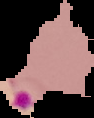

In [ ]:
# Quarta Imagem
dir_teste = test_dir + '/Positivo_Malaria'

random_file = random.choice(os.listdir(dir_teste))

image_test = dir_teste + '/' + random_file

test_image = load_img(image_test, target_size = (115, 115))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Positivo'
else:
    prediction = 'Negativo'

Image(filename=image_test)

In [ ]:
# Previsão da quarta imagem
prediction

'Positivo'

## Fine Tuning

In [ ]:
conv_base = tf.keras.applications.VGG16 (
              weights='imagenet',  # Uso dos pesos aprendidos no "imagenet"
              include_top=False,   # Não inclui a parte MLP (top) da CNN
              input_shape=(115, 115, 3)
              )

conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 115, 115, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 115, 115, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 115, 115, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 57, 57, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 57, 57, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 57, 57, 128)       147584    
                                                              

In [ ]:
model = tf.keras.models.Sequential()

# Modelo base
model.add(conv_base)

# Novo classificador
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Classificação binária

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1179904   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 15,894,849
Trainable params: 15,894,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
# Compila com uma taxa de aprendizado pequena = 0,00002 para limitar as

lr = 2e-5
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
              metrics=['accuracy'])

In [ ]:
history = model.fit(training_set,
                epochs = _epochs,
                batch_size=32,
                validation_data = validation_set)

Epoch 1/10
689/689 [==============================] - 111s 156ms/step - loss: 0.3695 - accuracy: 0.8556 - val_loss: 0.2588 - val_accuracy: 0.9053
Epoch 2/10
689/689 [==============================] - 118s 171ms/step - loss: 0.2495 - accuracy: 0.9047 - val_loss: 0.2463 - val_accuracy: 0.8944
Epoch 3/10
689/689 [==============================] - 116s 168ms/step - loss: 0.2249 - accuracy: 0.9139 - val_loss: 0.1995 - val_accuracy: 0.9267
Epoch 4/10
689/689 [==============================] - 122s 178ms/step - loss: 0.2087 - accuracy: 0.9209 - val_loss: 0.1987 - val_accuracy: 0.9260
Epoch 5/10
689/689 [==============================] - 120s 174ms/step - loss: 0.2020 - accuracy: 0.9222 - val_loss: 0.1832 - val_accuracy: 0.9303
Epoch 6/10
689/689 [==============================] - 125s 182ms/step - loss: 0.1917 - accuracy: 0.9275 - val_loss: 0.1782 - val_accuracy: 0.9361
Epoch 7/10
689/689 [==============================] - 117s 170ms/step - loss: 0.1884 - accuracy: 0.9291 - val_loss: 0.1713 -

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
# Compila com uma taxa de aprendizado bem pequena = 0,00001 para limitar as
# os ajustes nas representações aprendidas pelas três camadas treinadas.
# Atualizações muito grandes podem prejudicar essas representações.

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics='accuracy')


# Ajusta
history = model.fit(training_set,
                    epochs=_epochs,
                    validation_data=validation_set)

Epoch 1/5
689/689 [==============================] - 116s 165ms/step - loss: 0.1694 - accuracy: 0.9390 - val_loss: 0.1439 - val_accuracy: 0.9496
Epoch 2/5
689/689 [==============================] - 118s 172ms/step - loss: 0.1461 - accuracy: 0.9493 - val_loss: 0.1304 - val_accuracy: 0.9499
Epoch 3/5
689/689 [==============================] - 113s 164ms/step - loss: 0.1319 - accuracy: 0.9535 - val_loss: 0.1165 - val_accuracy: 0.9594
Epoch 4/5
689/689 [==============================] - 110s 159ms/step - loss: 0.1233 - accuracy: 0.9560 - val_loss: 0.1096 - val_accuracy: 0.9608
Epoch 5/5
689/689 [==============================] - 112s 162ms/step - loss: 0.1169 - accuracy: 0.9582 - val_loss: 0.1117 - val_accuracy: 0.9637


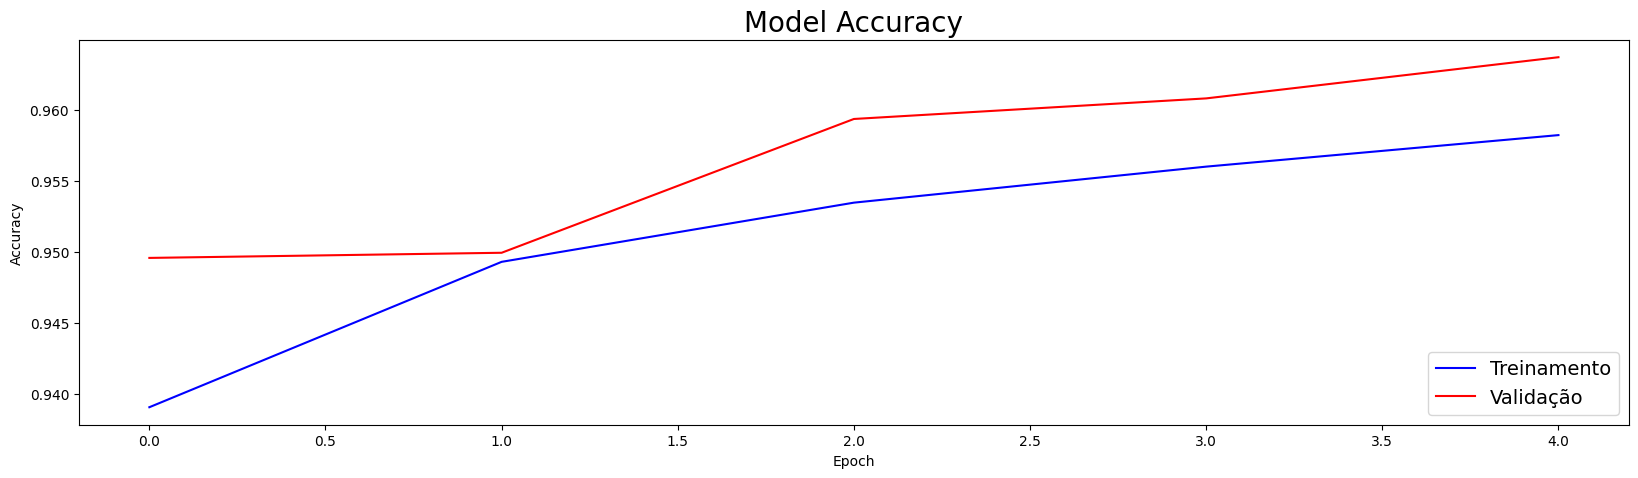

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='lower right', fontsize=14)
plt.show()

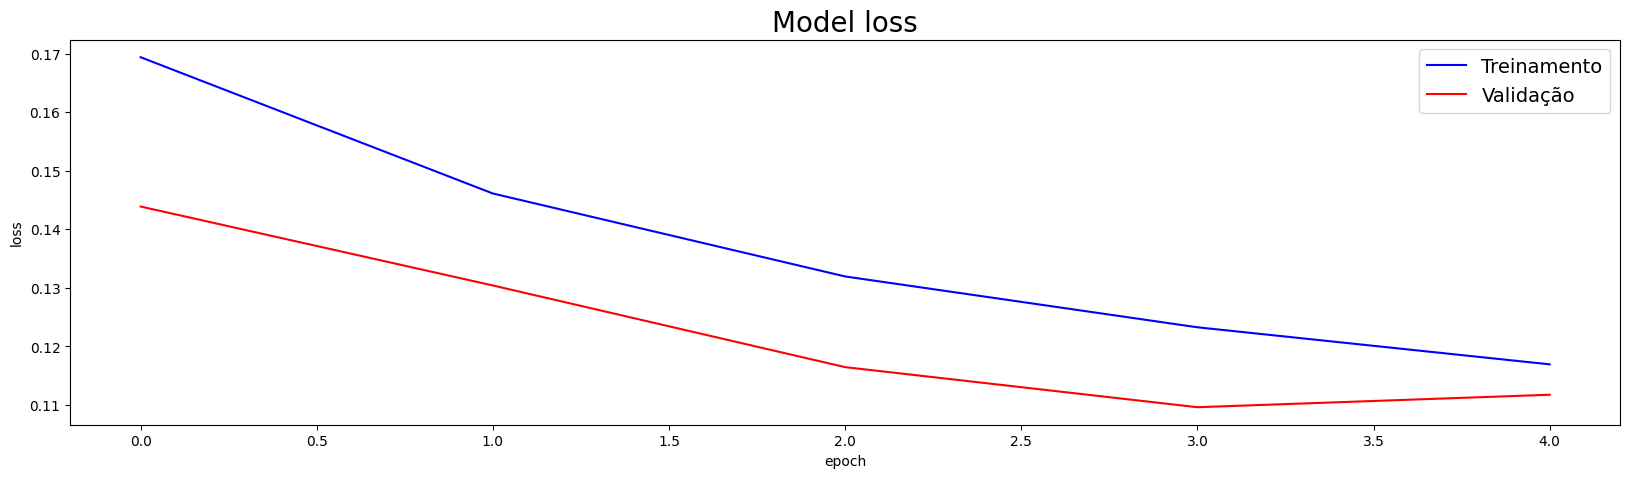

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

## Salvando o modelo

In [ ]:
#salvando modelo do keras

from keras.models import load_model

path_model = 'Supeita_Malaria.h5'

model.save(path_model)



In [ ]:
# carregando modleo do keras

from keras.models import load_model

model = load_model(path_model)

model.summary()

**O YOLO**

O modelo You Only Look Once (YOLO) faz a detecção precisa e rápida, e é um dos mais utilizados há anos.

## Descrição

A detecção de objetos é uma tarefa de VC que envolve:

1. Localização de objetos em uma uma imagem
2. Classificação dos objetos

**O YOLO**

O modelo You Only Look Once (YOLO) faz a detecção **precisa e rápida**, e é um dos mais utilizados há anos.

A proposta original encontra-se no artigo:
- Joseph Redmon, et al., **You Only Look Once: Unified, Real-Time Object Detection**; 2015.

**Modelos do YOLO**

<img src="https://drive.google.com/uc?export=view&id=1UQ4wwEltr4FVflHmiQuqm8KmKWfV9b4c" alt="drawing" width="400"/>

Quanto maior o modelo escolhido, melhor a qualidade de previsão que você pode obter, mas mais lento ele funcionará.

In [ ]:
!pip install -U ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 55.4MB/s]


In [ ]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
results = model.train(data='coco8.yaml', epochs=100, imgsz=115)

Ultralytics YOLOv8.0.155 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=100, patience=50, batch=16, imgsz=115, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [ ]:
results = model('/content/Imagens_Supeita_Malaria_split/train/Positivo_Malaria/C100P61ThinF_IMG_20150918_144104_cell_162.png')


image 1/1 /content/Imagens_Supeita_Malaria_split/train/Positivo_Malaria/C100P61ThinF_IMG_20150918_144104_cell_162.png: 128x128 1 person, 26.4ms
Speed: 0.7ms preprocess, 26.4ms inference, 12.7ms postprocess per image at shape (1, 3, 128, 128)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couc

In [ ]:
# Acessar as detecções e classes
detections = results  # Obter as detecções da primeira imagem
class_labels = model.model.names  # Nomes das classes

In [ ]:
class_labels

## Conclusão

Obteve-se um resultado final de 96% de precisão para o nosso conjunto de treinos.

